# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

In [182]:
df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [15]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [13]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [24]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [17]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [23]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [19]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [20]:
print(f'Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [21]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [25]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [26]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [28]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [29]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [27]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [32]:
df_tesla.isna().sum().sum()

0

In [33]:
print(f'Missing values for Tesla?: {df_tesla.isna().sum().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isna().sum().sum()}')
print(f'Missing values for BTC Search?:{df_btc_search.isna().sum().sum()} ')

Missing values for Tesla?: 0
Missing values for U/E?: 0
Missing values for BTC Search?:0 


In [34]:
print(f'Missing values for BTC price?: {df_btc_price.isna().sum().sum()}')

Missing values for BTC price?: 2


**Challenge**: Remove any missing values that you found. 

In [35]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [37]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [39]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [40]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [41]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [42]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [43]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [183]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [47]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [48]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [51]:
df_btc_price_monthly = df_btc_price.resample('M',on='DATE').last()

In [54]:
df_btc_price_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [174]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [151]:
# Register date converters to avoid warning messages
pd.options.plotting.matplotlib.register_converters = True

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

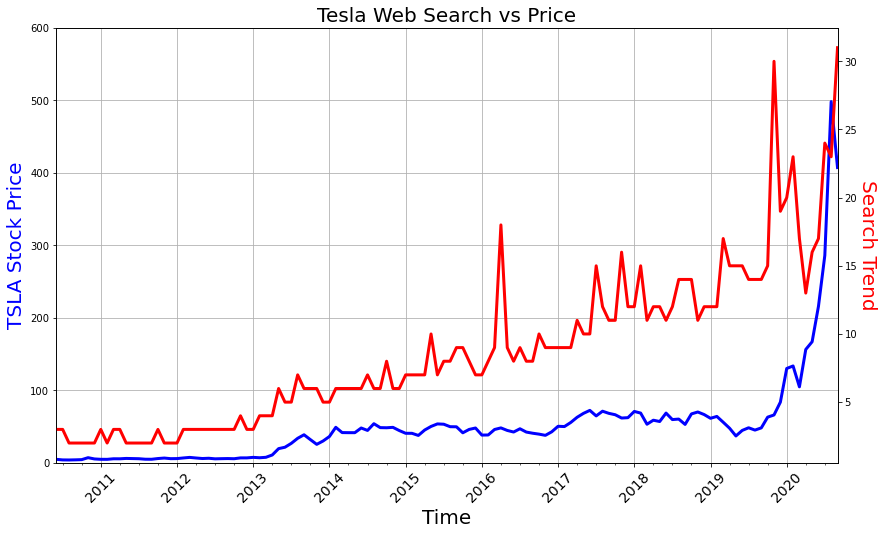

In [177]:
fig,ax = plt.subplots(figsize=(14,8))

ax2 = ax.twinx()


df_tesla.plot.line(x='MONTH',y='TSLA_USD_CLOSE',ax=ax,linewidth=3,legend=False,color='blue')
df_tesla.plot.line(x='MONTH',y='TSLA_WEB_SEARCH',ax=ax2,linewidth=3,color='red',legend=False)

#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)

#fig.legend(fontsize=20)
ax.set_ylabel("TSLA Stock Price",fontsize=20,color='blue')
ax.set_xlabel("Time",fontsize=20)
ax.tick_params(axis='x',labelsize=14,labelrotation=45,)
ax.set_title("Tesla Web Search vs Price",fontsize=20)
ax.set_ylim(0,600)
ax.set_xlim(df_tesla.MONTH.min(),df_tesla.MONTH.max())
#ax2.tick_params(labelsize=15)
ax2.set_ylabel("Search Trend",fontsize=20,color='red',rotation=270,labelpad=20)
ax.grid()#



#plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [194]:
df_btc_price_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


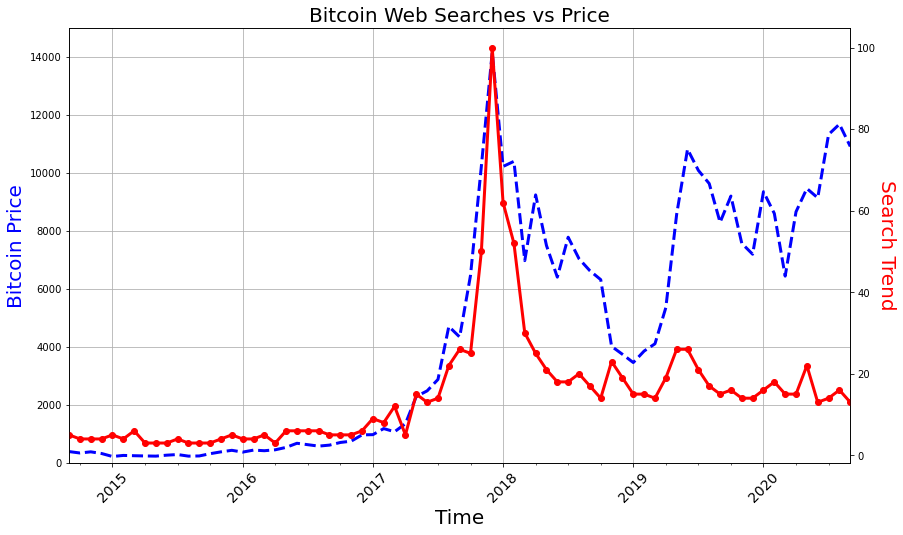

In [216]:
fig,ax = plt.subplots(figsize=(14,8))

ax2 = ax.twinx()


df_btc_price_monthly.plot.line(y='CLOSE',ax=ax,linewidth=3,legend=False,color='blue',linestyle='dashed')
df_btc_search.plot.line(x='MONTH',y='BTC_NEWS_SEARCH',ax=ax2,linewidth=3,color='red',marker='o',legend=False)




#fig.legend(fontsize=20)

ax.set_ylabel("Bitcoin Price",fontsize=20,color='blue')
ax.set_xlabel("Time",fontsize=20)
ax.tick_params(axis='x',labelsize=14,labelrotation=45,)
ax.set_title("Bitcoin Web Searches vs Price",fontsize=20)
ax.set_ylim(0,15000)
ax.set_xlim(df_btc_search.MONTH.min(),df_btc_search.MONTH.max())
#ax2.tick_params(labelsize=15)
ax2.set_ylabel("Search Trend",fontsize=20,color='red',rotation=270,labelpad=20)
ax.grid()#




#plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

In [209]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6
...,...,...,...
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9


**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

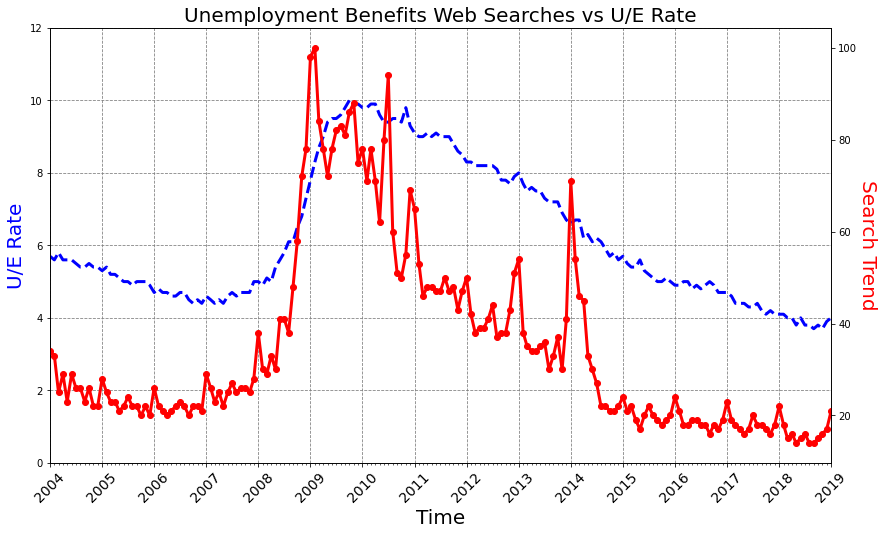

In [243]:
fig,ax = plt.subplots(figsize=(14,8))

ax2 = ax.twinx()


ax.plot(df_unemployment.MONTH,df_unemployment.UNRATE,linewidth=3,color='blue',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH,linewidth=3,color='red',marker='o')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


#fig.legend(fontsize=20)

ax.set_ylabel("U/E Rate",fontsize=20,color='blue')
ax.set_xlabel("Time",fontsize=20)
ax.tick_params(axis='x',labelsize=14,labelrotation=45,)
ax.set_title("Unemployment Benefits Web Searches vs U/E Rate",fontsize=20)
ax.set_ylim(0,12)
ax.set_xlim(df_unemployment.MONTH.min(),df_unemployment.MONTH.max())
#ax2.tick_params(labelsize=15)
ax2.set_ylabel("Search Trend",fontsize=20,color='red',rotation=270,labelpad=20)
ax.grid(color='grey',linestyle='--')#




#plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [237]:
six_month_average = df_unemployment.rolling(window=6).mean()

In [236]:
six_month_average

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,34.000000,5.700000
1,33.500000,5.650000
2,30.666667,5.700000
3,30.250000,5.675000
4,28.800000,5.660000
...,...,...
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333


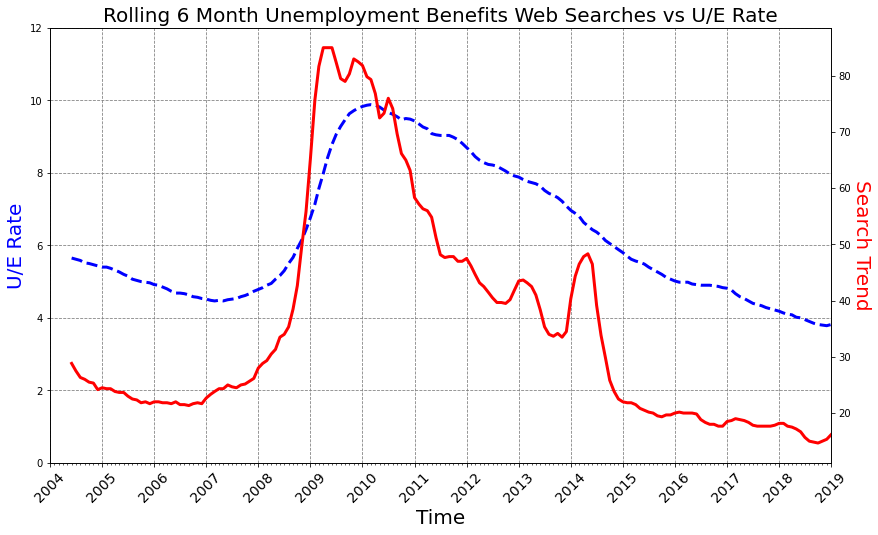

In [244]:
fig,ax = plt.subplots(figsize=(14,8))

ax2 = ax.twinx()


ax.plot(df_unemployment.MONTH,six_month_average.UNRATE,linewidth=3,color='blue',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,six_month_average.UE_BENEFITS_WEB_SEARCH,linewidth=3,color='red')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


#fig.legend(fontsize=20)

ax.set_ylabel("U/E Rate",fontsize=20,color='blue')
ax.set_xlabel("Time",fontsize=20)
ax.tick_params(axis='x',labelsize=14,labelrotation=45,)
ax.set_title("Rolling 6 Month Unemployment Benefits Web Searches vs U/E Rate",fontsize=20)
ax.set_ylim(0,12)
ax.set_xlim(df_unemployment.MONTH.min(),df_unemployment.MONTH.max())
#ax2.tick_params(labelsize=15)
ax2.set_ylabel("Search Trend",fontsize=20,color='red',rotation=270,labelpad=20)
ax.grid(color='grey',linestyle='--')#




#plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [245]:
unrate_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv",parse_dates=[0])

In [246]:
unrate_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


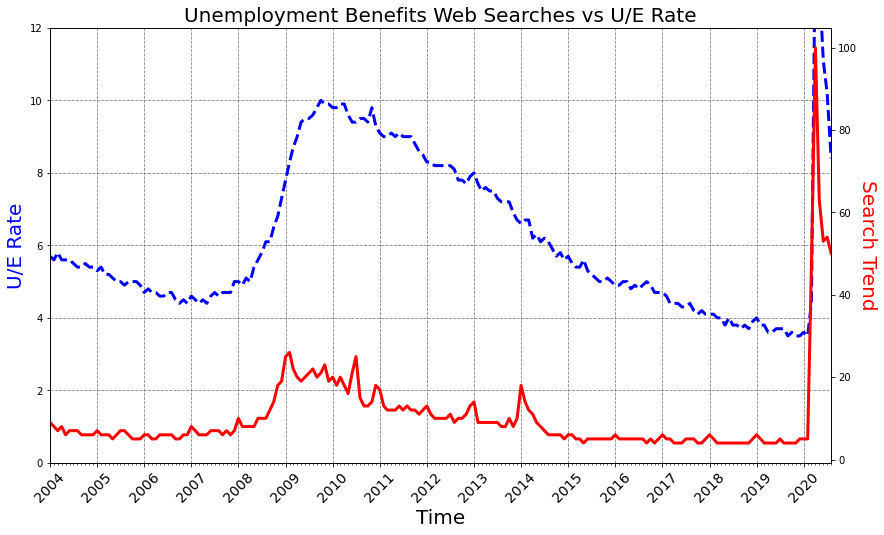

In [255]:
fig,ax = plt.subplots(figsize=(14,8))

ax2 = ax.twinx()


ax.plot(unrate_2020.MONTH,unrate_2020.UNRATE,linewidth=3,color='blue',linestyle='dashed')
ax2.plot(unrate_2020.MONTH,unrate_2020.UE_BENEFITS_WEB_SEARCH,linewidth=3,color='red')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


#fig.legend(fontsize=20)

ax.set_ylabel("U/E Rate",fontsize=20,color='blue')
ax.set_xlabel("Time",fontsize=20)
ax.tick_params(axis='x',labelsize=14,labelrotation=45,)
ax.set_title("Unemployment Benefits Web Searches vs U/E Rate",fontsize=20)
ax.set_ylim(0,12)
ax.set_xlim(unrate_2020.MONTH.min(),unrate_2020.MONTH.max())
#ax2.tick_params(labelsize=15)
ax2.set_ylabel("Search Trend",fontsize=20,color='red',rotation=270,labelpad=20)
ax.grid(color='grey',linestyle='--')#




#plt.show()